# Urban Sound Classification

#### Dataset link: https://urbansounddataset.weebly.com/urbansound8k.html

### Importing libraries

In [1]:
import os
import pandas as pd
import librosa
import numpy as np
import IPython.display as ipd
from glob import glob
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Training dataset

Examining sigle sound file

In [19]:
file_name = 'E:/Documents/04-Project/CSE1014/Train/2.wav'

ipd.Audio(file_name)

Load sound file

In [20]:
data, sampling_rate = librosa.load(file_name)

print('shape is {} sampling rate is {}'.format(data.shape,sampling_rate))

print('data type is', data.dtype)

shape is (88200,) sampling rate is 22050
data type is float32


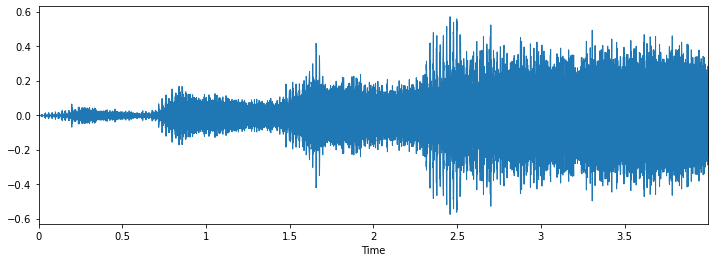

In [21]:
import librosa.display

plt.figure(figsize=(12, 4))

librosa.display.waveplot(data, sr=sampling_rate)

#### Spectrograms of various classes

-33.91557 46.08443


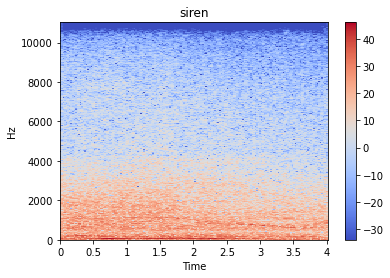

In [93]:
def files_to_spec(filename):
    data, rate = librosa.load(filename)
    return data_to_spec(data)

file = train_files[0]
sp = files_to_spec(file)
print(np.amin(sp), np.amax(sp))
show_file(file)

-37.45797 42.54203


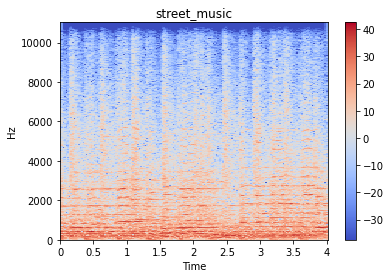

In [94]:
file = train_files[1]
sp = files_to_spec(file)
print(np.amin(sp), np.amax(sp))
show_file(file)

-24.799843 55.200157


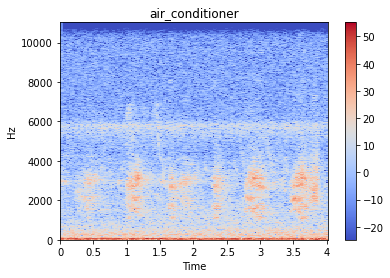

In [95]:
file = train_files[3]
sp = files_to_spec(file)
print(np.amin(sp), np.amax(sp))
show_file(file)

-32.16585 47.83415


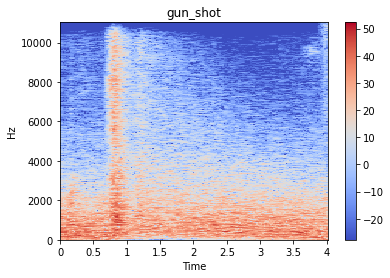

In [96]:
file = train_files[20]
sp = files_to_spec(file)
print(np.amin(sp), np.amax(sp))
show_file(file)

-38.291534 41.708466


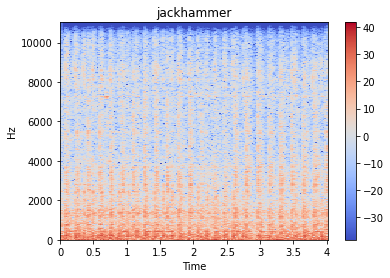

In [97]:
file = train_files[8]
sp = files_to_spec(file)
print(np.amin(sp), np.amax(sp))
show_file(file)

-3.1576614 76.84234


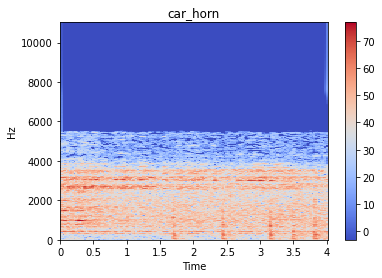

In [98]:
file = train_files[9]
sp = files_to_spec(file)
print(np.amin(sp), np.amax(sp))
show_file(file)

In [2]:
#importing saved features
train_spec_load = np.load('train_spec_nodrop.npy')
train_labels_load = np.load('train_label_nodrop.npy')
train_spec_load.shape

(5435, 1025, 173)

### Importing Training dataset and metadata

In [18]:
df= pd.read_csv("C:/Users/ashke/Documents/04-Project/CSE1015/data/UrbanSound8k/metadata/UrbanSound8k.csv",names=['slice_file_name','fsID','start','end','salience','fold','classID','Class'])

In [19]:
metadata=df.drop(["fsID","start","end","fold","classID"],axis=1)

In [20]:
for i in range(1,metadata.shape[0]):
    if metadata['salience'][i]=='1':
        metadata['Class'][i] = metadata['Class'][i] + str(1)
    if metadata['salience'][i]=='2':
        metadata['Class'][i] = metadata['Class'][i] + str(2)
        
metadata

,slice_file_name,salience,Class
0,slice_file_name,salience,class
1,100032-3-0-0.wav,1,dog_bark1
2,100263-2-0-117.wav,1,children_playing1
3,100263-2-0-121.wav,1,children_playing1
4,100263-2-0-126.wav,1,children_playing1
...,...,...,...
8728,99812-1-2-0.wav,2,car_horn2
8729,99812-1-3-0.wav,2,car_horn2
8730,99812-1-4-0.wav,2,car_horn2
8731,99812-1-5-0.wav,2,car_horn2


Seperating soundfiles into 20 labels based on class and salience(2=background 1=foreground)

In [21]:
metadata[1:]
# def file_to_label(filename):
#     fname = os.path.basename(filename)
#     classname = metadata.loc[metadata['slice_file_name']==fname]
#     return classname.values.tolist()[0][1]+classname.values.tolist()[0][1]
classname = metadata.loc[metadata['slice_file_name']=='2937-1-0-0.wav']
classname.values.tolist()[0][2]

'car_horn1'

In [7]:
#importing training audio files
train_files2 = glob('C:/Users/ashke/Documents/04-Project/CSE1015/data/UrbanSound8k/audio/train/*.wav')

## Function definitions

In [2]:
TARGET_LEN = 88200
HZ_SLICE = 14

#converts audio files to spectrograms
def data_to_spec(data):
    D = librosa.stft(data)
    return librosa.power_to_db(np.abs(D)**2, ref=np.median)

def file_to_spec(filename):
    data,rate = librosa.load(filename)
    if data.shape[0] != TARGET_LEN:
        data = extend_short_sounds(data)
    return data_to_spec(data)
#returns class names(labels) of audio based on file name
def file_to_label(filename):
    fname = os.path.basename(filename)
    classname = metadata.loc[metadata['slice_file_name']==fname]
    return classname.values.tolist()[0][2]
#prints spectrograms
def show_file(filename):
    plt.title(file_to_label(filename))
    librosa.display.specshow(file_to_spec(filename), x_axis='time', y_axis='linear');
    plt.colorbar();
#streches audio files that are <4secs
def extend_short_sounds(data):
    stretched = librosa.effects.time_stretch(data, rate=data.shape[0]/TARGET_LEN)
    return stretched[:TARGET_LEN:]

def drop_frequency_bands(data):
    return data[::HZ_SLICE,]

def show_progress(progress):
    if progress % 40:
        print('.',end="")
    else:
        print(".")

In [3]:
#function that extracts features from all the audiofiles
def wav_to_stft(files,metadata):
    info = []
    data_arr = []
    progress = 0
    for filename in files:
        d = file_to_spec(filename)
        data_arr.append(d)
        if isinstance(metadata,pd.DataFrame):
            info.append(file_to_label(filename))
        else:
            info.append(filename)
        progress+=1
        show_progress(progress)
    return data_arr, info


In [11]:
#saving the extracted features
train_data2, train_labels2 = wav_to_stft(train_files2,metadata)
np.save('train_spec_nodrop5',train_data2)
np.save('train_label_nodrop5',train_labels2)
print('done')

........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
................

C:\Users\ashke\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(


.......
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........

C:\Users\ashke\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(


...

C:\Users\ashke\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(


.............
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
...............done


In [22]:
#20 labels of sounds
classes2 = metadata[1:].Class.unique()
class_nums1 = pd.factorize(classes2)
cdict1 = {k:v for (k,v) in zip(class_nums1[1],class_nums1[0])}
inverted_cdict = dict([[v,k] for k,v in cdict1.items()])
cdict1

{'dog_bark1': 0,
 'children_playing1': 1,
 'car_horn2': 2,
 'air_conditioner1': 3,
 'dog_bark2': 4,
 'air_conditioner2': 5,
 'street_music1': 6,
 'gun_shot1': 7,
 'siren2': 8,
 'engine_idling1': 9,
 'siren1': 10,
 'jackhammer1': 11,
 'drilling1': 12,
 'drilling2': 13,
 'engine_idling2': 14,
 'children_playing2': 15,
 'street_music2': 16,
 'car_horn1': 17,
 'jackhammer2': 18,
 'gun_shot2': 19}

In [12]:
#loading saved features
train_spec_load2 = np.load('train_spec_nodrop5.npy')

In [14]:
train_labels_load2 = np.load('train_label_nodrop5.npy')

### Data split

In [15]:
from sklearn.model_selection import train_test_split

In [23]:
metadata = np.array(list(map(lambda k: cdict1[k], train_labels_load2)))

train_data2, test_data2, train_labels2, test_labels2 = train_test_split(
    train_spec_load2,
    metadata,
    test_size  = 0.30,
    random_state = 42
)

validation_data3, test_data3, validation_labels3, test_labels3 = train_test_split(
    test_data2,
    test_labels2,
    test_size=0.30,
    random_state=42
)

print(train_data2.shape)
print(validation_data3.shape)
print(test_data2.shape)

(5526, 1025, 173)
(1658, 1025, 173)
(2369, 1025, 173)


In [24]:
train_data2= train_data2.reshape((train_data2.shape[0], 1025, 173, 1))
train_data2= train_data2.astype('float32')/255
test_data2= test_data2.reshape((test_data2.shape[0], 1025, 173, 1))
test_data2= test_data2.astype('float32')/255
validation_data3= validation_data3.reshape((validation_data3.shape[0], 1025, 173, 1))
validation_data3= validation_data3.astype('float32')/255

train_data2.shape

(5526, 1025, 173, 1)

### Model Definition and Training

In [ ]:
model= Sequential()
model.add(
    layers.Conv2D(
        32,
        (2,2),
        activation='relu',
        input_shape=(1025,173,1)
    )
)
model.add(layers.MaxPooling2D((2,2)))
model.add(
    layers.Conv2D(
        64,
        (2,2),
        activation='relu',
        input_shape=train_data2.shape
    )
)
model.add(layers.MaxPooling2D((2,2)))
model.add(
    layers.Conv2D(
        128,
        (2,2),
        activation='relu',
        input_shape=train_data2.shape
    )
)
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
model.summary()

In [18]:
#model compilation
model.compile(loss= 'sparse_categorical_crossentropy', 
             optimizer='rmsprop',
             metrics=['accuracy']
             )
validation_labels3

array([10,  6,  8, ...,  3,  7,  9], dtype=int64)

In [19]:
example_batch= train_data2[:5]
example_result= model.predict(example_batch)
example_result[0]

array([0.05006894, 0.05002565, 0.04972631, 0.05034548, 0.04986603,
       0.04990689, 0.04957438, 0.04952585, 0.0501322 , 0.04994772,
       0.05043092, 0.04970083, 0.0500761 , 0.05036985, 0.04980143,
       0.05018073, 0.04969458, 0.05056215, 0.04992495, 0.05013898],
      dtype=float32)

In [20]:
history= model.fit(train_data2, train_labels2, epochs=16, verbose= 1, 
                   validation_data=(validation_data3, validation_labels3))

Epoch 1/16
173/173 [==============================] - 749s 4s/step - loss: 2.7272 - accuracy: 0.2562 - val_loss: 1.4996 - val_accuracy: 0.5199
Epoch 2/16
173/173 [==============================] - 897s 5s/step - loss: 1.3345 - accuracy: 0.5881 - val_loss: 1.0575 - val_accuracy: 0.6707
Epoch 3/16
173/173 [==============================] - 847s 5s/step - loss: 0.6909 - accuracy: 0.7878 - val_loss: 0.9817 - val_accuracy: 0.7135
Epoch 4/16
173/173 [==============================] - 808s 5s/step - loss: 0.3203 - accuracy: 0.9088 - val_loss: 1.0827 - val_accuracy: 0.7322
Epoch 5/16
173/173 [==============================] - 785s 5s/step - loss: 0.1337 - accuracy: 0.9646 - val_loss: 1.2946 - val_accuracy: 0.7624
Epoch 6/16
173/173 [==============================] - 821s 5s/step - loss: 0.1081 - accuracy: 0.9757 - val_loss: 1.6132 - val_accuracy: 0.7171
Epoch 7/16
173/173 [==============================] - 804s 5s/step - loss: 0.0535 - accuracy: 0.9873 - val_loss: 1.2663 - val_accuracy: 0.7925

### Saving Model and weights

In [25]:
import yaml

In [26]:
model_yaml = model.to_yaml()

with open("urban_sound_classi_ml_model.yaml","w") as f:
    f.write(model_yaml)

NameError: name 'model' is not defined

In [37]:
model.save_weights("weights.h5")

### Importing the saved model

In [27]:
from tensorflow.keras.models import model_from_yaml

In [28]:
with open("urban_sound_classi_ml_model.yaml","r") as f:
    moda_yml = f.read()
    
loaded_model = model_from_yaml(moda_yml)

In [29]:
loaded_model.load_weights("weights.h5")

In [30]:
loaded_model.compile(loss= 'sparse_categorical_crossentropy', 
             optimizer='rmsprop',
             metrics=['accuracy']
             )


### Model Evalutation

In [31]:
test_loss2, test_acc2= loaded_model.evaluate(test_data2, test_labels2)
test_acc2

75/75 [==============================] - 143s 2s/step - loss: 1.9106 - accuracy: 0.7538


0.745884358882904

In [39]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(cdict1)]
print(classification_report(test_data2, test_labels2, target_names=target_names))

ValueError: Classification metrics can't handle a mix of unknown and multiclass targets

#### Sample predictions

In [ ]:
slice_files= glob('C:/Users/ashke/Documents/04-Project/CSE1014/data/UrbanSound8k/audio/pred/*.wav')

In [ ]:
def shape_make(arr):
    data= arr.reshape((arr.shape[0], arr.shape[1], arr.shape[2], 1))
    return data.astype('float32')/255

slice_files[:10]
processed_wavs, file_names= wav_to_stft(slice_files[:10], slice_files[:10])

final= shape_make(np.array(processed_wavs))

predictions= loaded_model.predict(final)
predictions

In [ ]:
for i in range(len(file_names)):
    p=np.argmax(predictions[i])
    print('Model predicts {} is {}\n'.format(
        os.path.basename(file_names[i]), inverted_cdict[p])
    )

In [77]:
fname= file_names[9]
print(os.path.basename(fname))
ipd.Audio(fname)

101382-2-0-10.wav


#### Long audio files

In [47]:
slice_files=glob('E:/Documents/04-Project/CSE1014/*.wav')

In [46]:
from pydub import AudioSegment
from pydub.utils import make_chunks

long_audio = AudioSegment.from_file("long_audio/long_audio1.wav" , "wav") 
slice_length = 3000  #2s slicing
slices = make_chunks(long_audio, slice_length) 

#Export all of the individual slices as wav files

for i, chunk in enumerate(slices):
    chunk_name = "slice{0}.wav".format(i)
    print ("exporting", chunk_name)
    chunk.export(chunk_name, format="wav")

exporting slice0.wav
exporting slice1.wav
exporting slice2.wav
exporting slice3.wav


In [48]:
def shape_make(arr):
    data= arr.reshape((arr.shape[0], arr.shape[1], arr.shape[2], 1))
    return data.astype('float32')/255

slice_files[:10]
processed_wavs, file_names= wav_to_stft(slice_files[:10], slice_files[:10])

final= shape_make(np.array(processed_wavs))

predictions= loaded_model.predict(final)
predictions

....

array([[1.07480639e-17, 5.10372689e-10, 2.42530952e-12, 1.20833421e-12,
        2.87971376e-16, 8.58767972e-13, 9.99990344e-01, 5.14730229e-20,
        6.07311479e-10, 8.38273828e-19, 2.11170074e-11, 9.46745124e-19,
        2.63820541e-14, 2.42971216e-16, 2.63803883e-18, 3.44594575e-10,
        9.63299863e-06, 9.59375409e-26, 9.23721193e-18, 4.33833281e-13],
       [1.45264733e-06, 1.59917050e-07, 1.12489142e-21, 1.38618964e-24,
        1.23578100e-03, 1.16473934e-14, 7.61069357e-01, 2.00096545e-13,
        2.11607397e-01, 1.34468921e-17, 4.50920655e-11, 1.02197933e-17,
        2.76444216e-18, 1.06624995e-20, 1.60716099e-14, 2.60853767e-02,
        1.47416852e-08, 7.84193171e-22, 3.82378916e-16, 4.51908306e-07],
       [3.66890654e-13, 4.45931875e-10, 4.14589221e-14, 4.89024642e-05,
        1.50636073e-08, 4.52265652e-07, 3.61418650e-02, 1.50542901e-17,
        1.62902747e-09, 9.63808119e-01, 6.88245438e-17, 1.64828405e-12,
        1.79697524e-09, 9.60650903e-17, 4.61026015e-15, 9.0551

In [58]:
print('This file contains the following sounds: ')
for i in range(len(file_names)):
    p=np.argmax(predictions[i])
    print(' {}'.format(
       inverted_cdict[p])
    )

This file contains the following sounds: 
 street_music1
 street_music1
 engine_idling1
 engine_idling1


In [54]:
fname= file_names[3]
print(os.path.basename(fname))
ipd.Audio(fname)

slice3.wav


### Inference

Our model is able to predict the audio files based on salience and sound classes with an accuracy of 74.5884358882904%

We were also able to find out what sounds were in an audio file (long_audio) that contains various sounds mixed up to some good extent.